Refer to the below link for better understanding:  

https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

**Problem**

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

# Import Libraries

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Get the Data


In [99]:
df=pd.read_csv("Classified Data")

In [100]:
df.head()


,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [101]:
dm=pd.read_csv("Classified Data",index_col=0)

In [102]:
dm.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [103]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [104]:
X=dm.drop(columns=['TARGET CLASS'],axis=1)

In [105]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [106]:
x=sc.fit_transform(X)

In [107]:
type(x)

numpy.ndarray

In [108]:
X_NEW=pd.DataFrame(x,columns=X.columns)

In [109]:
X_NEW.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [110]:
Y_NEW=dm[['TARGET CLASS']]

In [111]:
Y_NEW.head()

,TARGET CLASS
0,1
1,0
2,0
3,1
4,1


## Train Test Split

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NEW,Y_NEW,test_size=0.3)

## Using KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn=KNeighborsClassifier(n_neighbors=5)

In [115]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [116]:
knn.score(X_test,y_test)

0.9166666666666666

## Choosing a K Value

In [117]:
x=np.array([1,2,3,4,1,2,3])
y=np.array([1,3,4,4,1,7,8])

In [118]:
y!=x

array([False,  True,  True, False, False,  True,  True])

In [119]:
np.mean(y!=x)  # (Total True) / (Total True +Total False)

0.5714285714285714

In [120]:
error_rate=[]

In [121]:
Y_new_test=np.array(y_test).flatten()

In [122]:
Y_new_test

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], d

In [123]:
knn.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], d

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn.predict(X_test))

0.9166666666666666

In [125]:
import warnings
warnings.filterwarnings("ignore")
for i in range(1,40):  # range of K
    knm = KNeighborsClassifier(n_neighbors=i)
    knm.fit(X_train,y_train)
    pred_i = knm.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_new_test))
    

In [126]:
error_rate

[0.1,
 0.1,
 0.08333333333333333,
 0.08666666666666667,
 0.08333333333333333,
 0.08333333333333333,
 0.07666666666666666,
 0.08,
 0.07,
 0.06666666666666667,
 0.06333333333333334,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.06666666666666667,
 0.06333333333333334,
 0.07,
 0.07,
 0.06666666666666667,
 0.06666666666666667,
 0.06,
 0.07,
 0.07,
 0.06666666666666667,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.06333333333333334,
 0.06666666666666667,
 0.06333333333333334,
 0.07,
 0.07,
 0.06333333333333334,
 0.06666666666666667,
 0.06333333333333334,
 0.06666666666666667,
 0.07,
 0.06333333333333334,
 0.06666666666666667]

## Visualization

Text(0, 0.5, 'Error Rate')

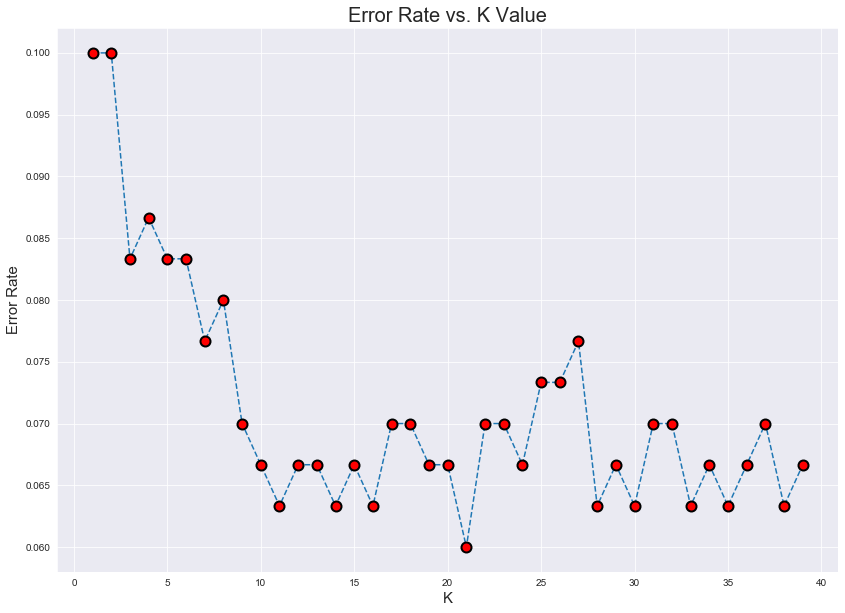

In [154]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize']=14,10
plt.plot(np.arange(1,40),error_rate,linestyle='--',marker='o',markersize=10,markerfacecolor='red',
        markeredgecolor='black',markeredgewidth=2)
plt.title('Error Rate vs. K Value',fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error Rate',fontsize=15)

##### choose the K value as having a minimum error rate.

In [156]:
model = KNeighborsClassifier(n_neighbors=23)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [157]:
model.score(X_test,y_test)

0.93

## Accuracy vs K

In [159]:
acc=[]
import warnings
warnings.filterwarnings("ignore")
for i in range(1,40):  # range of K
    knm = KNeighborsClassifier(n_neighbors=i)
    knm.fit(X_train,y_train)
    acc.append(knm.score(X_test,y_test))

Text(0, 0.5, 'Accuracy')

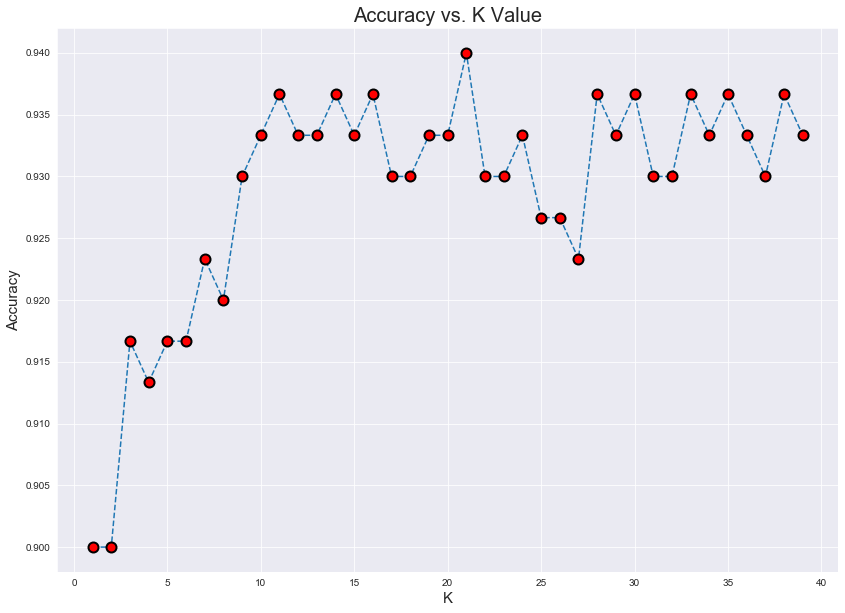

In [160]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize']=14,10
plt.plot(np.arange(1,40),acc,linestyle='--',marker='o',markersize=10,markerfacecolor='red',
        markeredgecolor='black',markeredgewidth=2)
plt.title('Accuracy vs. K Value',fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)

#### We can see that accuracy is highest for k=23